In [42]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/processed/processed_data.csv')
data.head()

,release_date,period_end,eps,eps_forecast,revenue,revenue_forecast,ticker,cash_and_cash_equivalents,goodwill_and_intangible_assets,investments,...,4d_after_open,4d_after_high,4d_after_low,4d_after_close,4d_after_volume,5d_after_open,5d_after_high,5d_after_low,5d_after_close,5d_after_volume
0,2019-10-25,2019-09-01,0.23,0.32,983160000.0,931930000.0,VTR,148063000.0,2.384900e+09,0.0,...,65.21,65.7100,64.63,65.10,2122092.0,65.12,65.30,63.1488,64.03,2114593.0
1,2019-07-26,2019-06-01,0.58,0.32,950720000.0,922960000.0,VTR,81987000.0,2.317792e+09,0.0,...,67.33,67.9500,66.51,67.67,2069256.0,67.76,69.18,67.7600,68.83,1749714.0
2,2019-04-26,2019-03-01,0.35,0.30,942870000.0,911100000.0,VTR,82514000.0,2.330366e+09,0.0,...,61.23,61.9900,60.96,61.53,2198358.0,61.75,62.58,61.4650,62.48,1767991.0
3,2019-02-08,2018-12-01,0.17,0.35,923260000.0,909590000.0,VTR,72277000.0,2.553503e+09,0.0,...,64.29,64.9236,64.02,64.74,2043458.0,64.98,65.25,64.6400,65.21,1925856.0
4,2018-10-26,2018-09-01,0.28,0.36,936540000.0,908790000.0,VTR,86107000.0,2.552146e+09,0.0,...,58.17,58.6100,57.51,58.11,2610532.0,57.79,57.79,55.6400,56.59,3015300.0


In [34]:
first = data.columns.get_loc('5d_before_open')
last = data.columns.get_loc('0d_release_open')
price_open = data.columns[first:last:5]
price_open

Index(['5d_before_open', '4d_before_open', '3d_before_open', '2d_before_open',
       '1d_before_open'],
      dtype='object')

In [40]:
price_df = data.loc[:, price_open]
price_df = price_df.div(price_df.iloc[:,0], axis=0)
price_df.head()

,5d_before_open,4d_before_open,3d_before_open,2d_before_open,1d_before_open
0,1.0,1.008757,1.015430,1.002224,1.015152
1,1.0,0.973726,0.978952,0.990710,0.982871
2,1.0,1.010124,0.997941,1.008751,1.019561
3,1.0,0.979861,0.984508,0.997676,0.990240
4,1.0,1.014090,0.986091,1.004697,1.023663


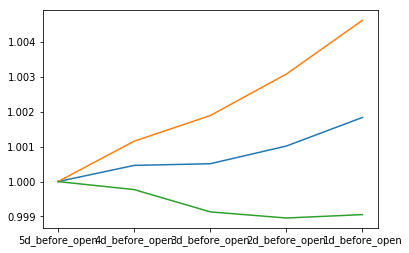

In [46]:
mu = price_df.mean()
var = price_df.var()

plt.plot(mu)
plt.plot(mu + 3 * var)
plt.plot(mu - 3 * var)
plt.show()

Replace all features related to price before release day with mean. 